<a href="https://colab.research.google.com/github/laume/PetAdoption/blob/master/PetAdoption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset description

In this competition you will predict the speed at which a pet is adopted, based on the pet’s listing on PetFinder. Sometimes a profile represents a group of pets. In this case, the speed of adoption is determined by the speed at which all of the pets are adopted. The data included text, tabular, and image data. See below for details. 
This is a Kernels-only competition. At the end of the competition, test data will be replaced in their entirety with new data of approximately the same size, and your kernels will be rerun on the new data.

### File descriptions


train.csv - Tabular/text data for the training set

test.csv - Tabular/text data for the test set

sample_submission.csv - A sample submission file in the correct format

breed_labels.csv - Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.

color_labels.csv - Contains ColorName for each ColorID

state_labels.csv - Contains StateName for each StateID

### Data Fields


PetID - Unique hash ID of pet profile

AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.

Type - Type of animal (1 = Dog, 2 = Cat)

Name - Name of pet (Empty if not named)

Age - Age of pet when listed, in months

Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)

Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)

Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)

Color1 - Color 1 of pet (Refer to ColorLabels dictionary)

Color2 - Color 2 of pet (Refer to ColorLabels dictionary)

Color3 - Color 3 of pet (Refer to ColorLabels dictionary)

MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)

FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)

Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)

Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)

Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)

Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

Quantity - Number of pets represented in profile

Fee - Adoption fee (0 = Free)

State - State location in Malaysia (Refer to StateLabels dictionary)

RescuerID - Unique hash ID of rescuer

VideoAmt - Total uploaded videos for this pet

PhotoAmt - Total uploaded photos for this pet

Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

### AdoptionSpeed


Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way: 

0 - Pet was adopted on the same day as it was listed. 

1 - Pet was adopted between 1 and 7 days (1st week) after being listed. 

2 - Pet was adopted between 8 and 30 days (1st month) after being listed. 

3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed. 

4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).


### Images

For pets that have photos, they will be named in the format of PetID-ImageNumber.jpg. Image 1 is the profile (default) photo set for the pet. For privacy purposes, faces, phone numbers and emails have been masked.

# Prepare environment and download data

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
from google.colab import files

In [0]:
uploaded = files.upload()

Saving kaggle-3.json to kaggle-3.json


In [0]:
# Let's make sure the kaggle.json file is present.
!mv kaggle-3.json kaggle.json
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Jul 18 15:02 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


In [0]:
# Copy the data set locally.
!kaggle competitions download -c petfinder-adoption-prediction

  0% 0.00/6.82k [00:00<?, ?B/s]
100% 6.82k/6.82k [00:00<00:00, 5.71MB/s]
  0% 0.00/88.0 [00:00<?, ?B/s]
100% 88.0/88.0 [00:00<00:00, 89.4kB/s]
  0% 0.00/285 [00:00<?, ?B/s]
100% 285/285 [00:00<00:00, 202kB/s]
  0% 0.00/2.66M [00:00<?, ?B/s]
100% 2.66M/2.66M [00:00<00:00, 87.0MB/s]
 99% 1.47G/1.49G [00:16<00:00, 64.9MB/s]
100% 1.49G/1.49G [00:16<00:00, 97.2MB/s]
 62% 33.0M/53.6M [00:00<00:00, 39.8MB/s]
100% 53.6M/53.6M [00:00<00:00, 68.6MB/s]
 44% 5.00M/11.3M [00:00<00:00, 18.4MB/s]
100% 11.3M/11.3M [00:00<00:00, 32.6MB/s]
  0% 0.00/579k [00:00<?, ?B/s]
100% 579k/579k [00:00<00:00, 174MB/s]
 38% 5.00M/13.3M [00:00<00:00, 35.2MB/s]
100% 13.3M/13.3M [00:00<00:00, 64.9MB/s]
  0% 0.00/2.89M [00:00<?, ?B/s]
100% 2.89M/2.89M [00:00<00:00, 96.0MB/s]
 98% 365M/371M [00:03<00:00, 126MB/s]
100% 371M/371M [00:04<00:00, 85.4MB/s]


# Import libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
!pip install tensorflow-gpu==2.0.0-beta1

import tensorflow as tf

     |████████████████████████████████| 348.9MB 110kB/s 
     |████████████████████████████████| 501kB 50.3MB/s 
     |████████████████████████████████| 3.1MB 45.8MB/s 


In [0]:
tf.__version__

'2.0.0-beta1'

# Prepare data

In [0]:
!ls

breed_labels.csv  sample_data	     test_sentiment.zip  train_sentiment.zip
color_labels.csv  state_labels.csv   test.zip		 train.zip
gdrive		  test_images.zip    train_images.zip
kaggle.json	  test_metadata.zip  train_metadata.zip


In [0]:
# !unzip -q test.zip
!unzip -q train.zip

In [0]:
mkdir train_images #test_images test_metadata train_metadata

In [0]:
!ls

breed_labels.csv  sample_data	     test_sentiment.zip  train_images.zip
color_labels.csv  state_labels.csv   test.zip		 train_metadata.zip
gdrive		  test_images.zip    train.csv		 train_sentiment.zip
kaggle.json	  test_metadata.zip  train_images	 train.zip


In [0]:
# As we fouud (by doinf exploratory analysis) that test_data don't have prediction labels,
# we are not going to use these data at the moment
!unzip -q train_images.zip -d train_images/
# !unzip -q test_images.zip -d test_images/
# !unzip -q test_metadata.zip -d test_metadata/
# !unzip -q train_metadata.zip -d train_metadata/

In [0]:
# mkdir test_sentiment

In [0]:
# !unzip -q test_sentiment.zip -d test_sentiment/

In [0]:
# !cat test_sentiment/000aa306a.json

In [0]:
# !cat test_metadata/000aa306a-1.json

# Explore the data

In [0]:
breed_labels = pd.read_csv('breed_labels.csv')
color_labels = pd.read_csv('color_labels.csv')
state_labels = pd.read_csv('state_labels.csv')
train_data = pd.read_csv('train.csv')
# test_data = pd.read_csv('test.csv')

In [0]:
breed_labels.head(2)

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound


In [0]:
color_labels.head(2)

,ColorID,ColorName
0,1,Black
1,2,Brown


In [0]:
state_labels.head(2)

,StateID,StateName
0,41336,Johor
1,41325,Kedah


In [0]:
train_data.head().T

,0,1,2,3,4
Type,2,2,1,1,1
Name,Nibble,No Name Yet,Brisco,Miko,Hunter
Age,3,1,1,4,1
Breed1,299,265,307,307,307
Breed2,0,0,0,0,0
Gender,1,1,1,2,1
Color1,1,1,2,1,1
Color2,7,2,7,2,0
Color3,0,0,0,0,0
MaturitySize,1,2,2,2,2


Merge and check full dataset 

In [0]:
# all_data = pd.concat([train_data, test_data], axis=0, sort=False)

In [0]:
train_data.isna().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [0]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,14993.0,1.457614,0.498217,1.0,1.0,1.0,2.0,2.0
Age,14993.0,10.452078,18.155790,0.0,2.0,3.0,12.0,255.0
Breed1,14993.0,265.272594,60.056818,0.0,265.0,266.0,307.0,307.0
Breed2,14993.0,74.009738,123.011575,0.0,0.0,0.0,179.0,307.0
Gender,14993.0,1.776162,0.681592,1.0,1.0,2.0,2.0,3.0
Color1,14993.0,2.234176,1.745225,1.0,1.0,2.0,3.0,7.0
Color2,14993.0,3.222837,2.742562,0.0,0.0,2.0,6.0,7.0
Color3,14993.0,1.882012,2.984086,0.0,0.0,0.0,5.0,7.0
MaturitySize,14993.0,1.862002,0.547959,1.0,2.0,2.0,2.0,4.0
FurLength,14993.0,1.467485,0.599070,1.0,1.0,1.0,2.0,3.0


In [0]:
# Drop Name and Description fields as they are not used for now
train_data = train_data.drop(['Name', 'Description', 'RescuerID'], axis=1)

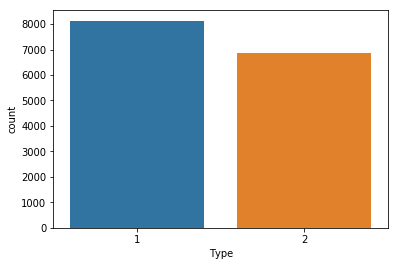

In [0]:
# Check pets by type (1 = Dog, 2 = Cat)
sns.countplot(x='Type', data=train_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


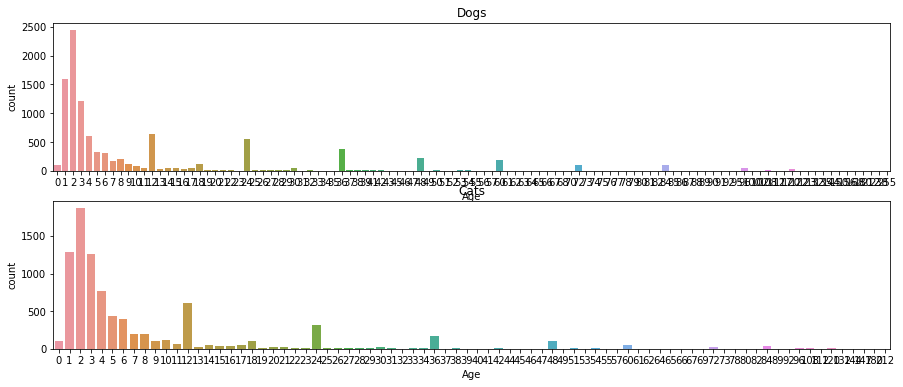

In [0]:
# Check pets by age (1 = Dog, 2 = Cat)
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
sns.countplot(x='Age', data=all_data[train_data.Type == 1])
plt.title('Dogs')

plt.subplot(2,1,2)
sns.countplot(x='Age', data=all_data[train_data.Type == 2])
plt.title('Cats')

plt.show()

In [0]:
# Add breed names to see what breeds are most frequent
train_data_breed_names = train_data.merge(breed_labels, left_on='Breed1', right_on='BreedID')

In [0]:
train_data_breed_names.head().T

,0,1,2,3,4
Type_x,2,2,2,2,2
Age,3,12,48,4,8
Breed1,299,299,299,299,299
Breed2,0,0,0,0,0
Gender,1,2,1,2,1
Color1,1,3,1,1,3
Color2,7,6,2,2,0
Color3,0,7,7,0,0
MaturitySize,1,2,3,2,2
FurLength,1,2,1,1,1


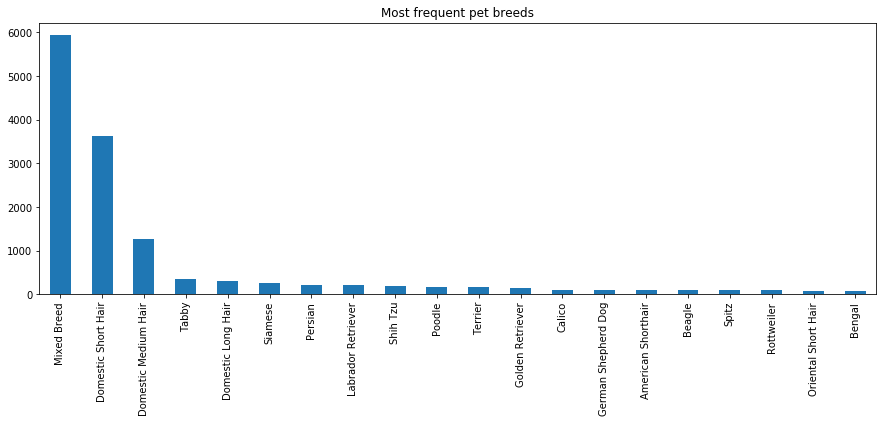

In [0]:
# Find most frequest Breeds of Pets

plt.figure(figsize=(15,5))
most_frequent_breeds = train_data_breed_names.BreedName.value_counts()[:20].plot.bar(title='Most frequent pet breeds')


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


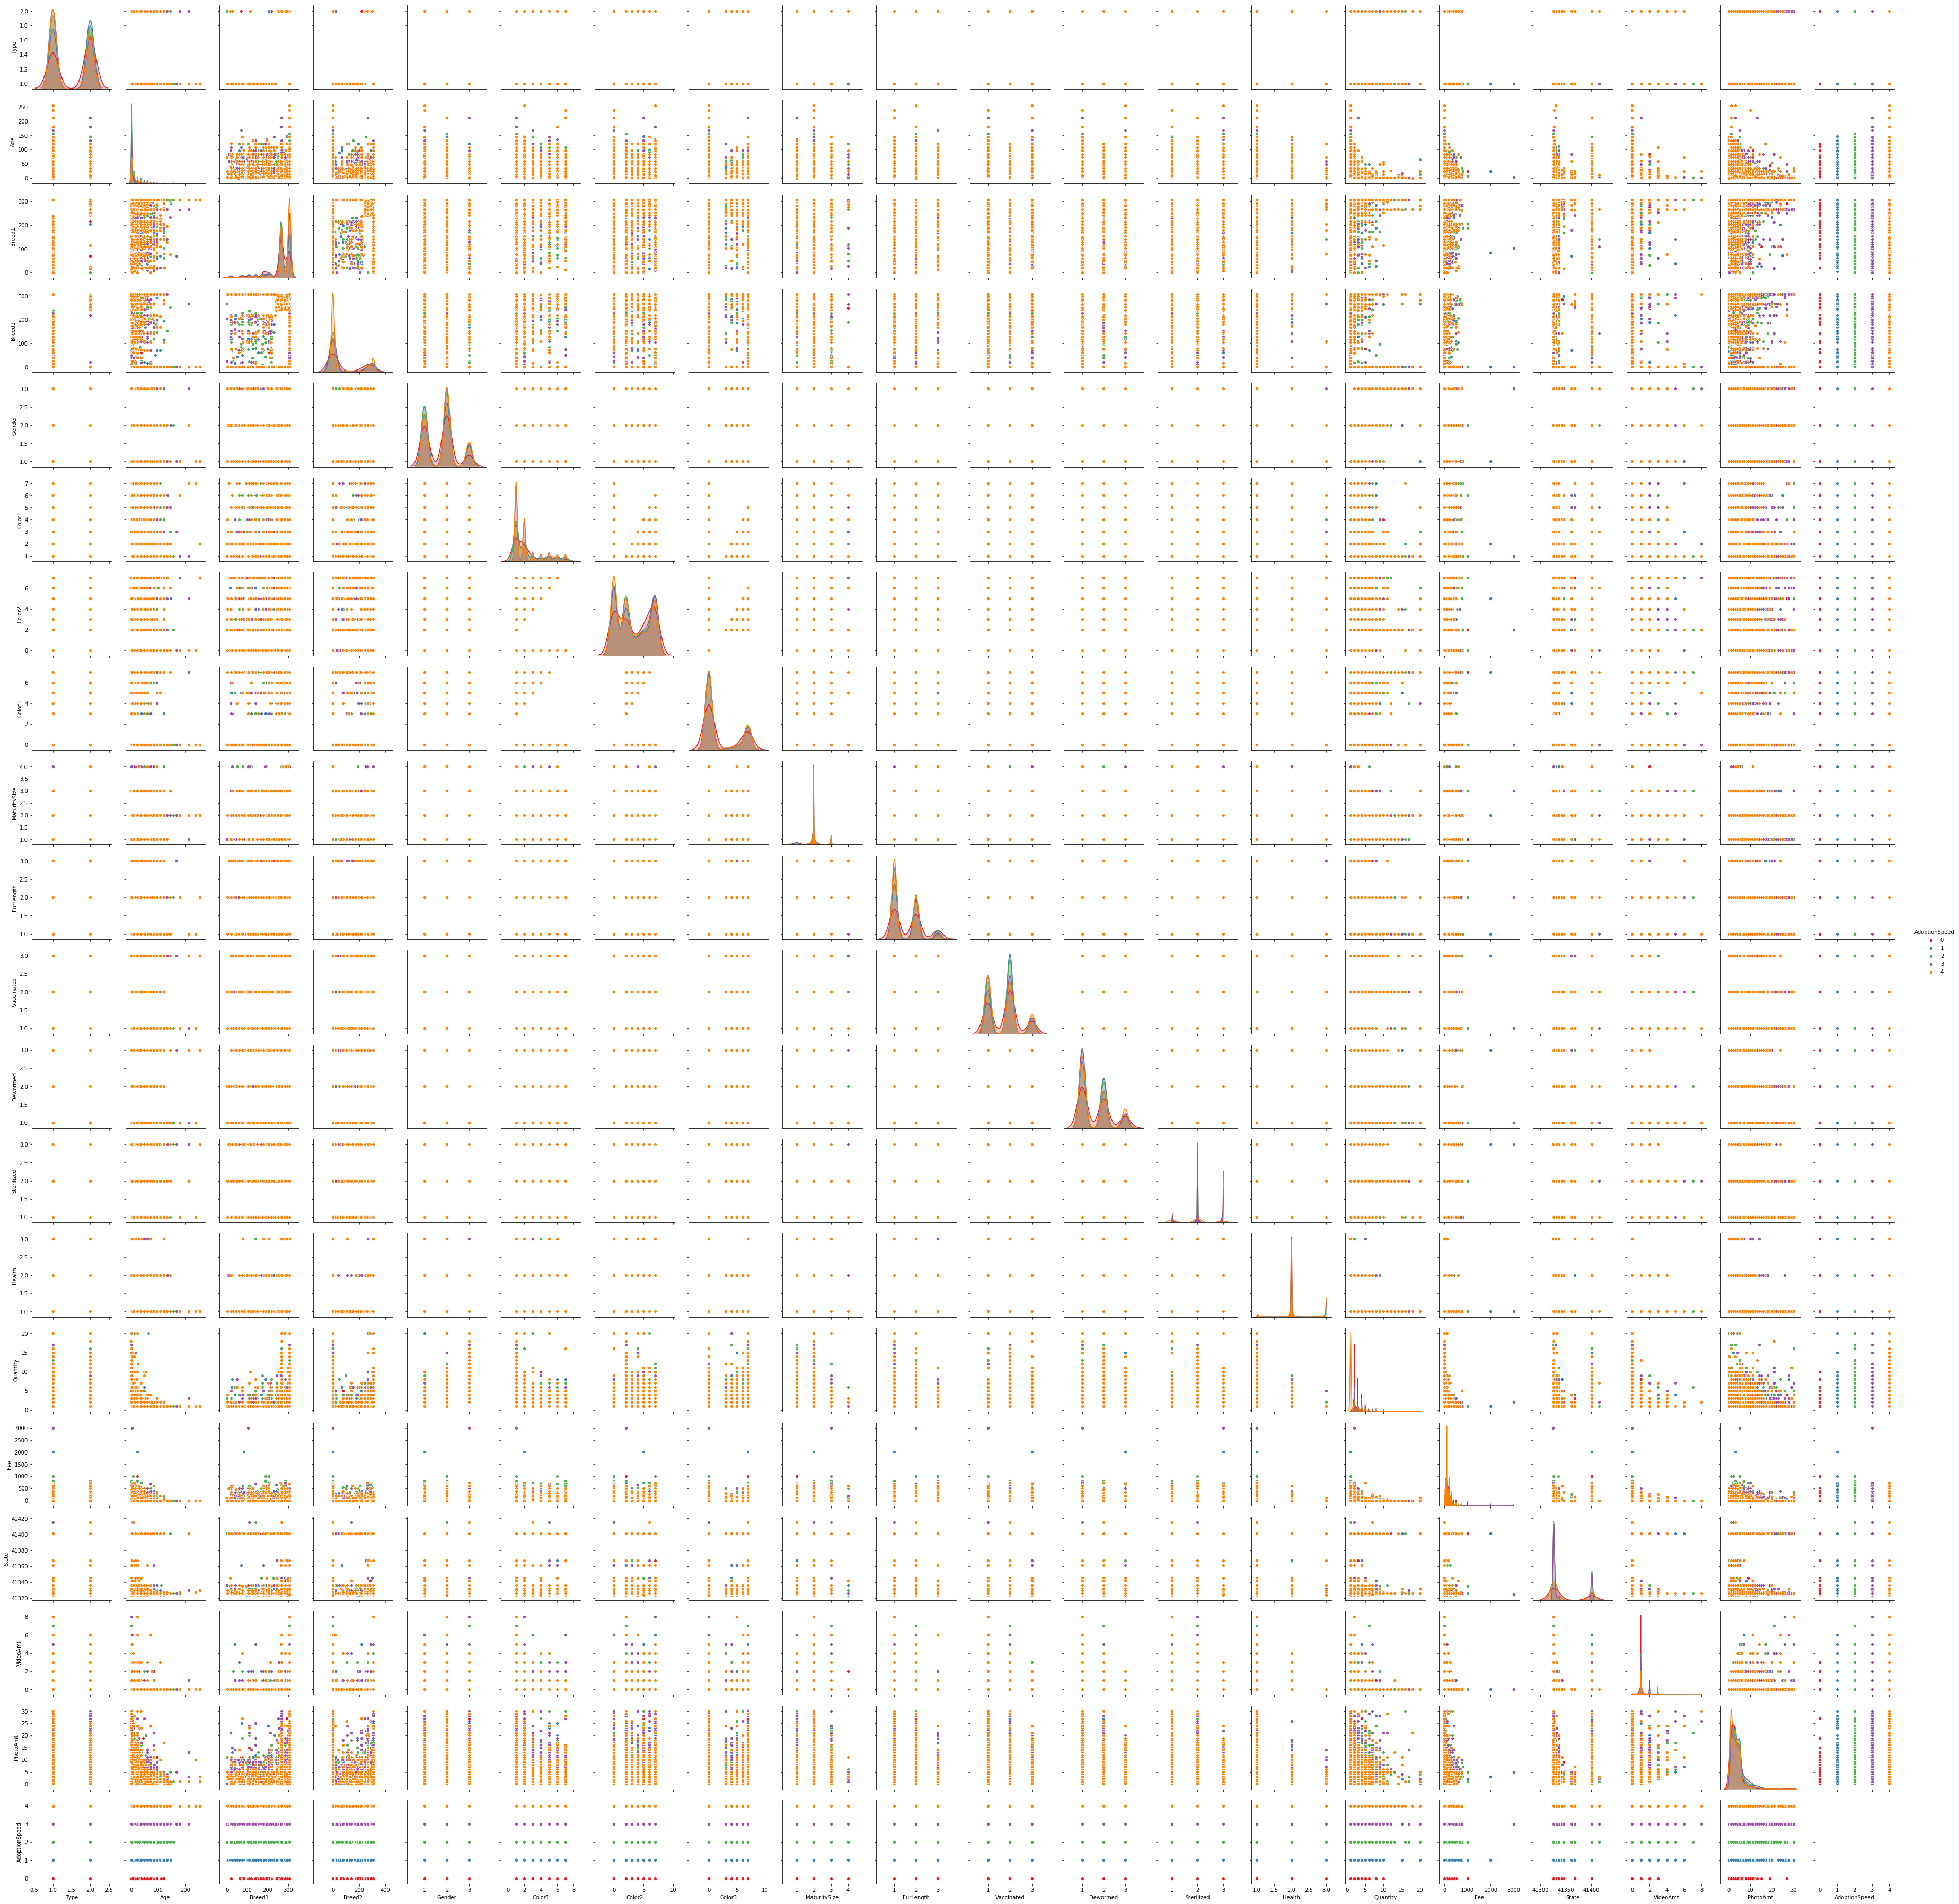

In [0]:
sns.pairplot(data=train_data.drop('AdoptionSpeed', axis=1), hue='AdoptionSpeed', palette='Set1')

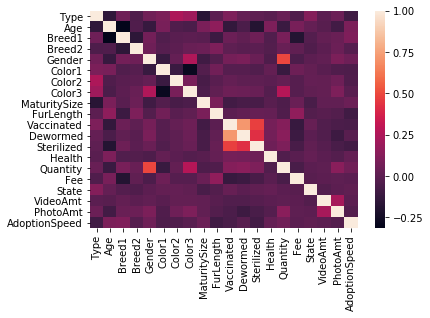

In [0]:
sns.heatmap(train_data.corr())

In [0]:
health state streilized gender

### Adoption speed interpretation:
0 - Pet was adopted on the same day as it was listed. 

1 - Pet was adopted between 1 and 7 days (1st week) after being listed. 

2 - Pet was adopted between 8 and 30 days (1st month) after being listed. 

3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed. 

4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)

Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)

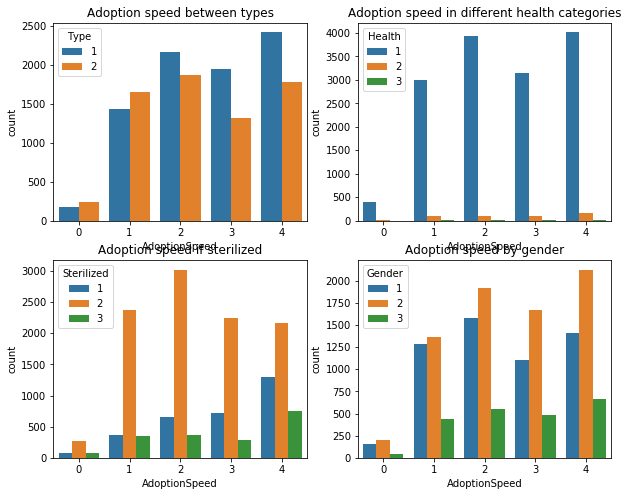

In [0]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.countplot(train_data['AdoptionSpeed'], hue=train_data['Type'])
plt.title('Adoption speed between types')

plt.subplot(2,2,2)
sns.countplot(train_data['AdoptionSpeed'], hue=train_data['Health'])
plt.title('Adoption speed in different health categories')

plt.subplot(2,2,3)
sns.countplot(train_data['AdoptionSpeed'], hue=train_data['Sterilized'])
plt.title('Adoption speed if sterilized')

plt.subplot(2,2,4)
sns.countplot(train_data['AdoptionSpeed'], hue=train_data['Gender'])
plt.title('Adoption speed by gender')

plt.show()

# Convert categorical data

In [0]:
train_data.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'VideoAmt', 'PetID',
       'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

In [0]:
categorical_cols = ['Type', 'Gender', 'Color1', 'Color2',
                    'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 
                    'Dewormed','Sterilized', 'Health']

In [0]:
train_data['Breed1'].max()

307

In [0]:
label_encode = ['Breed1', 'Breed2', 'State']

In [0]:
# Do data encoding
train_data_encoded = train_data.copy()

In [0]:
encoder = LabelEncoder()
train_data_encoded['Breed1'] = encoder.fit_transform(train_data_encoded['Breed1'])
train_data_encoded['Breed2'] = encoder.fit_transform(train_data_encoded['Breed2'])
train_data_encoded['State'] = encoder.fit_transform(train_data_encoded['State'])

In [0]:
train_data_encoded = pd.get_dummies(data=train_data_encoded, columns=categorical_cols)

In [0]:
train_data_encoded.head().T

,0,1,2,3,4
Age,3,1,1,4,1
Breed1,167,136,175,175,175
Breed2,0,0,0,0,0
Quantity,1,1,1,1,1
Fee,100,0,0,150,0
State,2,12,2,12,2
VideoAmt,0,0,0,0,0
PetID,86e1089a3,6296e909a,3422e4906,5842f1ff5,850a43f90
PhotoAmt,1,2,7,8,3
AdoptionSpeed,2,0,3,2,2


# Split the data and set categorical values

In [0]:
# Split the data
train_features, test_features, train_labels, test_labels = train_test_split(
    train_data.drop('AdoptionSpeed', axis=1),
    train_data.AdoptionSpeed,
    test_size=0.2
)
[x.shape for x in (train_features, test_features, train_labels, test_labels)]

[(11994, 20), (2999, 20), (11994,), (2999,)]

In [0]:
train_features, val_features, train_labels, val_labels = train_test_split(
    train_features,
    train_labels,
    test_size=0.2
)
[x.shape for x in (train_features, val_features, train_labels, val_labels)]

[(9595, 20), (2399, 20), (9595,), (2399,)]

In [0]:
# Split the encoded data to compare results

train_features_enc, test_features_enc, train_labels_enc, test_labels_enc = train_test_split(
    train_data_encoded.drop('AdoptionSpeed', axis=1),
    train_data_encoded.AdoptionSpeed,
    test_size=0.2
)
[x.shape for x in (train_features_enc, test_features_enc, train_labels_enc, test_labels_enc)]

[(11994, 53), (2999, 53), (11994,), (2999,)]

In [0]:
train_features_enc, val_features_enc, train_labels_enc, val_labels_enc = train_test_split(
    train_features_enc,
    train_labels_enc,
    test_size=0.2
)
[x.shape for x in (train_features_enc, val_features_enc, train_labels_enc, val_labels_enc)]

[(9595, 53), (2399, 53), (9595,), (2399,)]

# Create NN model for Adoption speed prediction

In [0]:
adoption_classes = list(train_labels.unique())
adoption_classes

[4, 1, 3, 2, 0]

In [0]:
train_features['State'].nunique()

14

In [0]:
# create iteartor for modell number - temp solution
number = iter(range(12,100))

In [0]:
next(number)

12

In [0]:
# Parameters
LR = 1e-3
N_EPOCHS = 50
BATCH_SIZE = 64
N_CLASSES = len(adoption_classes)

In [0]:
# Try different types of NN
def make_functional_model(n_outputs, input_shape, layer_size, dropout_rate):
    inputs = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.BatchNormalization()(inputs)
    x = tf.keras.layers.Dense(layer_size, kernel_initializer='he_uniform')(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.Dense(n_outputs, activation=tf.nn.softmax)(x)
    
    return tf.keras.Model(
        inputs=inputs,
        outputs=x,
    )

In [0]:
predictor = make_functional_model(N_CLASSES, train_features_enc.drop('PetID', axis=1).values.shape[1:], 128, 0.1)

In [0]:
predictor.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[
        tf.keras.metrics.sparse_categorical_accuracy,
    ]
)

In [0]:
# Save best model
filepath = f'./gdrive/My Drive/Bootcamp/best{next(number)}.h5'
print(filepath)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_sparse_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

./gdrive/My Drive/Bootcamp/best19.h5


In [0]:
predictor.fit(
    train_features_enc.drop('PetID', axis=1),
    train_labels_enc,
    validation_data=(val_features_enc.drop('PetID', axis=1).values, val_labels_enc.values),
    batch_size=BATCH_SIZE,
    epochs=N_EPOCHS,
    callbacks=callbacks_list,
) 

Train on 9595 samples, validate on 2399 samples
Epoch 1/50
9280/9595 [============================>.] - ETA: 0s - loss: 1.6666 - sparse_categorical_accuracy: 0.2957
Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.32722, saving model to ./gdrive/My Drive/Bootcamp/best19.h5
9595/9595 [==============================] - 1s 129us/sample - loss: 1.6615 - sparse_categorical_accuracy: 0.2974 - val_loss: 1.4828 - val_sparse_categorical_accuracy: 0.3272
Epoch 2/50
9280/9595 [============================>.] - ETA: 0s - loss: 1.4951 - sparse_categorical_accuracy: 0.3319
Epoch 00002: val_sparse_categorical_accuracy improved from 0.32722 to 0.33514, saving model to ./gdrive/My Drive/Bootcamp/best19.h5
9595/9595 [==============================] - 1s 74us/sample - loss: 1.4971 - sparse_categorical_accuracy: 0.3299 - val_loss: 1.4253 - val_sparse_categorical_accuracy: 0.3351
Epoch 3/50
9088/9595 [===========================>..] - ETA: 0s - loss: 1.4529 - sparse_categorical_accuracy

In [0]:
# predictor = tf.keras.models.load_model('./gdrive/My Drive/Bootcamp/best10.h5')  # at the moment the best 10 - 0.390

In [0]:
predictor = tf.keras.models.load_model(filepath)

In [0]:
predictor.evaluate(test_features_enc.drop('PetID', axis=1), test_labels_enc)

2999/2999 [==============================] - 0s 101us/sample - loss: 1.3815 - sparse_categorical_accuracy: 0.3848


[1.3814596193319322, 0.38479492]

In [0]:
# Second step increase layer_size
predictor = make_functional_model(N_CLASSES, train_features_enc.drop('PetID', axis=1).values.shape[1:], 256, 0.1)

In [0]:
predictor.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[
        tf.keras.metrics.sparse_categorical_accuracy,
    ]
)

In [0]:
# Save best model
filepath = f'./gdrive/My Drive/Bootcamp/best{next(number)}.h5'
print(filepath)

./gdrive/My Drive/Bootcamp/best20.h5


In [0]:
predictor.fit(
    train_features_enc.drop('PetID', axis=1),
    train_labels_enc,
    validation_data=(val_features_enc.drop('PetID', axis=1).values, val_labels_enc.values),
    batch_size=BATCH_SIZE,
    epochs=N_EPOCHS,
    callbacks=callbacks_list,
) 

Train on 9595 samples, validate on 2399 samples
Epoch 1/50
9408/9595 [============================>.] - ETA: 0s - loss: 1.6264 - sparse_categorical_accuracy: 0.3011
Epoch 00001: val_sparse_categorical_accuracy did not improve from 0.38308
9595/9595 [==============================] - 2s 166us/sample - loss: 1.6248 - sparse_categorical_accuracy: 0.3015 - val_loss: 1.4710 - val_sparse_categorical_accuracy: 0.3247
Epoch 2/50
8960/9595 [===========================>..] - ETA: 0s - loss: 1.4814 - sparse_categorical_accuracy: 0.3365
Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.38308
9595/9595 [==============================] - 1s 72us/sample - loss: 1.4825 - sparse_categorical_accuracy: 0.3358 - val_loss: 1.4286 - val_sparse_categorical_accuracy: 0.3464
Epoch 3/50
9152/9595 [===========================>..] - ETA: 0s - loss: 1.4525 - sparse_categorical_accuracy: 0.3419
Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.38308
9595/9595 [===================

In [0]:
predictor.evaluate(test_features_enc.drop('PetID', axis=1), test_labels_enc)

2999/2999 [==============================] - 0s 108us/sample - loss: 1.4106 - sparse_categorical_accuracy: 0.3738


[1.41063805849165, 0.37379128]

In [0]:
# Try bigger NN model
def make_functional_model_2(n_outputs, input_shape, layer_size, dropout_rate):
    inputs = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.BatchNormalization()(inputs)
    x = tf.keras.layers.Dense(layer_size, kernel_initializer='he_uniform')(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.Dense(layer_size, kernel_initializer='he_uniform')(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.Dense(layer_size, kernel_initializer='he_uniform')(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.Dense(n_outputs, activation=tf.nn.softmax)(x)
    
    return tf.keras.Model(
        inputs=inputs,
        outputs=x,
    )

In [0]:
# Third step
predictor = make_functional_model_2(N_CLASSES, train_features_enc.drop('PetID', axis=1).values.shape[1:], 256, 0.1)

In [0]:
predictor.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[
        tf.keras.metrics.sparse_categorical_accuracy,
    ]
)

In [0]:
# Save best model
filepath = f'./gdrive/My Drive/Bootcamp/best{next(number)}.h5'
print(filepath)

./gdrive/My Drive/Bootcamp/best21.h5


In [0]:
predictor.fit(
    train_features_enc.drop('PetID', axis=1),
    train_labels,
    validation_data=(val_features_enc.drop('PetID', axis=1).values, val_labels_enc.values),
    batch_size=BATCH_SIZE,
    epochs=N_EPOCHS,
    callbacks=callbacks_list,
) 

Train on 9595 samples, validate on 2399 samples
Epoch 1/50
9152/9595 [===========================>..] - ETA: 0s - loss: 1.7657 - sparse_categorical_accuracy: 0.2375
Epoch 00001: val_sparse_categorical_accuracy did not improve from 0.38308
9595/9595 [==============================] - 2s 157us/sample - loss: 1.7582 - sparse_categorical_accuracy: 0.2381 - val_loss: 1.5173 - val_sparse_categorical_accuracy: 0.2618
Epoch 2/50
8960/9595 [===========================>..] - ETA: 0s - loss: 1.5690 - sparse_categorical_accuracy: 0.2693
Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.38308
9595/9595 [==============================] - 1s 85us/sample - loss: 1.5671 - sparse_categorical_accuracy: 0.2683 - val_loss: 1.5518 - val_sparse_categorical_accuracy: 0.2551
Epoch 3/50
9088/9595 [===========================>..] - ETA: 0s - loss: 1.5214 - sparse_categorical_accuracy: 0.2864
Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.38308
9595/9595 [===================

In [0]:
predictor.evaluate(test_features_enc.drop('PetID', axis=1), test_labels_enc)

2999/2999 [==============================] - 0s 118us/sample - loss: 1.6967 - sparse_categorical_accuracy: 0.2734


[1.6967454830699462, 0.27342448]

Smaller architecture above worked better.
As well was tested without dropout and without Batchnormalization - the result was worse. When batch normalization was not used - validation accuracy not increased at all

In [0]:
# 4th step, try another optimizer

In [0]:
predictor = make_functional_model(N_CLASSES, train_features_enc.drop('PetID', axis=1).values.shape[1:], 256, 0.1)

In [0]:
predictor.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=LR),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[
        tf.keras.metrics.sparse_categorical_accuracy,
    ]
)

In [0]:
# Save best model
filepath = f'./gdrive/My Drive/Bootcamp/best{next(number)}.h5'
print(filepath)

./gdrive/My Drive/Bootcamp/best22.h5


In [0]:
predictor.fit(
    train_features_enc.drop('PetID', axis=1),
    train_labels_enc,
    validation_data=(val_features_enc.drop('PetID', axis=1).values, val_labels_enc.values),
    batch_size=BATCH_SIZE,
    epochs=N_EPOCHS,
    callbacks=callbacks_list,
) 

Train on 9595 samples, validate on 2399 samples
Epoch 1/50
8832/9595 [==========================>...] - ETA: 0s - loss: 1.6358 - sparse_categorical_accuracy: 0.3048
Epoch 00001: val_sparse_categorical_accuracy did not improve from 0.38308
9595/9595 [==============================] - 1s 130us/sample - loss: 1.6262 - sparse_categorical_accuracy: 0.3080 - val_loss: 1.4477 - val_sparse_categorical_accuracy: 0.3451
Epoch 2/50
8768/9595 [==========================>...] - ETA: 0s - loss: 1.4926 - sparse_categorical_accuracy: 0.3352
Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.38308
9595/9595 [==============================] - 1s 74us/sample - loss: 1.4887 - sparse_categorical_accuracy: 0.3355 - val_loss: 1.4261 - val_sparse_categorical_accuracy: 0.3489
Epoch 3/50
9472/9595 [============================>.] - ETA: 0s - loss: 1.4588 - sparse_categorical_accuracy: 0.3479
Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.38308
9595/9595 [===================

In [0]:
predictor.evaluate(test_features_enc.drop('PetID', axis=1), test_labels_enc)

2999/2999 [==============================] - 0s 102us/sample - loss: 1.4053 - sparse_categorical_accuracy: 0.3748


[1.4053088996600374, 0.3747916]

Result with Adam Optimizer was more accurate.
When training was performed on not One Hot Encoded data accuracy was almost the same. 

The best model accuracy was achieved by using not encoded data and small layer_size (128)

In [0]:
predictor = tf.keras.models.load_model('./gdrive/My Drive/Bootcamp/best10.h5')  # at the moment the best 10 - 0.390

In [0]:
predictor.evaluate(test_features.drop('PetID', axis=1), test_labels)

2999/2999 [==============================] - 0s 86us/sample - loss: 1.3570 - sparse_categorical_accuracy: 0.3975


[1.3570370724615395, 0.39746583]

In [0]:
predictor.summary()

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 19)]              0         
_________________________________________________________________
batch_normalization_45 (Batc (None, 19)                76        
_________________________________________________________________
dense_73 (Dense)             (None, 128)               2560      
_________________________________________________________________
leaky_re_lu_42 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 128)               512       
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 5)                 645

To get better results text data and images shall be used.

# Create Random Forest model

In [0]:
rfc_gs = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        "n_estimators": np.linspace(10, 500, 3).astype(int),
        "min_samples_leaf": np.linspace(1, 100, 3).astype(int),
        "max_depth": np.linspace(10, 100, 3).astype(int),
        "max_features": ['sqrt', 'log2', 0.1],
    },
    n_jobs=-1,
    cv=5,
    verbose=1,
)

In [0]:
# When testing model with non encoded labels got higher accuracy that's why non-encoded dataset is used for gridsearcCV:
rfc_gs.fit(train_features.drop('PetID', axis=1), train_labels)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   37.6s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  6.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
rfc_gs.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 255}

In [0]:
joblib.dump(rfc_gs, './gdrive/My Drive/Bootcamp/first_rfc_gs_3.pkl')  # at the moment the best

['./gdrive/My Drive/Bootcamp/first_rfc_gs_3.pkl']

In [0]:
rfc_gs = joblib.load('./gdrive/My Drive/Bootcamp/first_rfc_gs_3.pkl')

In [0]:
# rfc_gs.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [0]:
rfc_gs.best_score_  # accuracy without encoding 0.3955

0.4078165711307973

In [0]:
rfc_gs_test_preds = rfc_gs.predict(val_features.drop('PetID', axis=1))

In [0]:
print(confusion_matrix(val_labels, rfc_gs_test_preds))

[[  0  29  24   1  22]
 [  0 134 223  19 133]
 [  0  86 298  51 198]
 [  0  52 190  80 194]
 [  0  53 114  29 469]]


In [0]:
print(classification_report(val_labels, rfc_gs_test_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       0.38      0.26      0.31       509
           2       0.35      0.47      0.40       633
           3       0.44      0.16      0.23       516
           4       0.46      0.71      0.56       665

    accuracy                           0.41      2399
   macro avg       0.33      0.32      0.30      2399
weighted avg       0.40      0.41      0.38      2399



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
# Try RandomizesSearchCV for encoded values
rfc_rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions={
        "n_estimators": np.arange(10, 500),
        "min_samples_leaf": np.arange(1, 100),
        "max_depth": np.arange(1, 100),
        "max_features": ['sqrt', 'log2', 0.1],
    },
    n_iter=100,
    cv=5,
    n_jobs=-1,
    verbose=1,
)

In [0]:
rfc_rs.fit(train_features_enc.drop('PetID', axis=1), train_labels_enc)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.4min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [0]:
joblib.dump(rfc_rs,'./gdrive/My Drive/Bootcamp/first_rfc_rs_3.pkl')

In [0]:
rfc_rs = joblib.load('./gdrive/My Drive/Bootcamp/first_rfc_rs_3.pkl')

In [0]:
rfc_rs.best_params_

{'max_depth': 79,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'n_estimators': 245}

In [0]:
rfc_rs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=79, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=245,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Best score for encoded values
rfc_rs.best_score_

0.39572694111516415

In [0]:
# Check score for non encoded values
rfc_rs.fit(train_features.drop('PetID', axis=1), train_labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   34.6s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [0]:
rfc_rs.best_score_

0.4034392912975508

In [0]:
joblib.dump(rfc_rs,'./gdrive/My Drive/Bootcamp/second_rfc_rs_1.pkl')

['./gdrive/My Drive/Bootcamp/second_rfc_rs_1.pkl']

In [0]:
rfc_rs = joblib.load('./gdrive/My Drive/Bootcamp/second_rfc_rs_1.pkl')

In [0]:
rfc_rs.best_params_

{'max_depth': 53,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'n_estimators': 430}

In [0]:
rfc_rs_val_preds = rfc_rs.predict(val_features.drop('PetID', axis=1))

In [0]:
print(classification_report(val_labels, rfc_rs_val_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       0.65      0.55      0.59       509
           2       0.62      0.69      0.65       633
           3       0.80      0.46      0.58       516
           4       0.57      0.83      0.68       665

    accuracy                           0.63      2399
   macro avg       0.53      0.51      0.50      2399
weighted avg       0.63      0.63      0.61      2399



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
